In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
training_data = np.load(f'../fashion_train.npy')
test_data = np.load(f'../fashion_test.npy')

In [3]:
df_train = pd.DataFrame(training_data)
df_test = pd.DataFrame(test_data)

In [4]:
X_train = df_train.iloc[:, :-1]  # All columns except the last one are features
y_train = df_train.iloc[:, -1]   # The last column is the label

X_test = df_test.iloc[:, :-1]  # All columns except the last one are features
y_test = df_test.iloc[:, -1]   # The last column is the label

In [5]:


clf_Tree = DecisionTreeClassifier(random_state=42)

clf_Tree.fit(X_train,y_train)


y_pred_best = clf_Tree.predict(X_test)

KeyboardInterrupt: 

In [10]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Decision Tree Accuracy:", accuracy_best)

# Compute confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:")
print(cm_best)

Best Decision Tree Accuracy: 0.7682
Best Model Confusion Matrix:
[[740   7  21  55 177]
 [ 15 933   5  33  14]
 [ 27   4 754  22 193]
 [ 48  31  19 825  77]
 [167  12 172  60 589]]


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


num_samples = X_train.shape[0]
# MLPClassifier configuration with improvements
mlp = MLPClassifier(
    hidden_layer_sizes=(16,),  # Two hidden layers with more neurons
    activation='relu',           # Relu as a substitute for leaky_relu
    solver='sgd',                # Stochastic Gradient Descent
    learning_rate_init=0.01,    # Reduced learning rate
    max_iter=10000,              # Number of iterations
    batch_size=num_samples,              # Mini-batch gradient descent
    momentum=0,                # Enable momentum
    random_state=42              # Ensures reproducibility
)


# Training
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8272
Confusion Matrix:
[[799   2  18  62 119]
 [  8 942  12  33   5]
 [ 24   2 855  20  99]
 [ 34  10  15 897  44]
 [159   1 154  43 643]]


In [27]:
clf_Knn = KNeighborsClassifier(n_neighbors=10)
clf_Knn.fit(X_train, y_train);

In [24]:
# Make predictions on the test set
y_pred_best = clf_Knn.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Decision Tree Accuracy:", accuracy_best)

# Compute confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:")
print(cm_best)

Best Decision Tree Accuracy: 0.825
Best Model Confusion Matrix:
[[857   2  25  22  94]
 [ 11 950  12  21   6]
 [ 15   1 866  14 104]
 [ 50   5  19 882  44]
 [203   0 194  33 570]]


In [55]:
import numpy as np
training_data = np.load(f'../fashion_train.npy')
test_data = np.load(f'../fashion_test.npy')

labels = training_data[:, -1]
training_data = training_data[:,:-1] / 255 # Normalise pixel values
training_data = np.c_[training_data, labels] # Add labels back

labels = test_data[:, -1]
test_data = test_data[:,:-1] / 255 # Normalise pixel values
test_data = np.c_[test_data, labels] # Add labels back

x_train = training_data[:, :-1]
y_train = training_data[:, -1]

x_test = test_data[:, :-1]
y_test = test_data[:, -1]


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import ELU, ELU

model = models.Sequential([
    # First block
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)),
    ELU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same'),
    ELU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second block
    layers.Conv2D(128, (3, 3), padding='same'),
    ELU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same'),
    ELU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Third block
    layers.Conv2D(256, (3, 3), padding='same'),
    ELU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same'),
    ELU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(256),
    ELU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128),
    ELU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    # Output layer
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Ensure the input data is reshaped and normalized
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=23, restore_best_weights=True)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

# Train the model
#pre train
#model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
#train
model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/30
313/313 [==============================] - 6s 15ms/step - loss: 0.8209 - accuracy: 0.6920 - val_loss: 1.4800 - val_accuracy: 0.3904 - lr: 0.0010
Epoch 2/30
313/313 [==============================] - 4s 14ms/step - loss: 0.4862 - accuracy: 0.8196 - val_loss: 0.5201 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 3/30
313/313 [==============================] - 4s 14ms/step - loss: 0.4142 - accuracy: 0.8457 - val_loss: 0.3941 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 4/30
313/313 [==============================] - 4s 14ms/step - loss: 0.3685 - accuracy: 0.8626 - val_loss: 0.3418 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 5/30
313/313 [==============================] - 4s 14ms/step - loss: 0.3551 - accuracy: 0.8678 - val_loss: 0.3256 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 6/30
313/313 [==============================] - 5s 14ms/step - loss: 0.3159 - accuracy: 0.8814 - val_loss: 0.3056 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 7/30
313/313 [==============================] - 4s 14ms/st

In [56]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_304 (Conv2D)         (None, 28, 28, 64)        640       
                                                                 
 elu_311 (ELU)               (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_251 (Ba  (None, 28, 28, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_305 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 elu_312 (ELU)               (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_151 (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                               

157/157 [==============================] - 1s 3ms/step


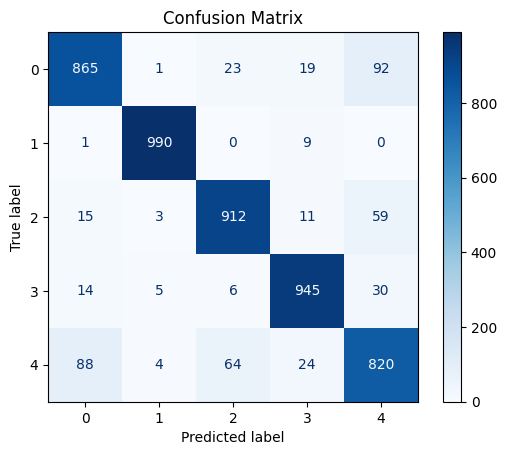

Confusion Matrix:
[[865   1  23  19  92]
 [  1 990   0   9   0]
 [ 15   3 912  11  59]
 [ 14   5   6 945  30]
 [ 88   4  64  24 820]]
[0.865, 0.99, 0.912, 0.945, 0.82]
total accueracy 0.9064


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Make predictions
y_pred_probs = model.predict(x_test)  # Get probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix for reference
print("Confusion Matrix:")
print(cm)


misclassification_rate=[]

for i in range(5):
    total_row = np.sum(cm[i,:])
    error_rate = cm[i,i] / total_row
    misclassification_rate.append(error_rate)
print(misclassification_rate)

print("total accueracy",accuracy_score(y_test, y_pred))


In [9]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("TensorFlow version:", tf.__version__)
print("Available devices:")
print(device_lib.list_local_devices())
print("GPUs available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.1
Available devices:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3015291549001289253
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7783579648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16496484609787583810
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import tensorflow as tf
try:
    tf.debugging.set_log_device_placement(True)
    tf.constant([[1.0]], dtype=tf.float32).gpu()
    print("GPU operations are enabled!")
except RuntimeError as e:
    print("Error:", e)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Instructions for updating:
Use tf.identity instead.
GPU operations are enabled!


Epoch 1/50
79/79 [==============================] - 4s 35ms/step - loss: 0.9618 - accuracy: 0.6183 - val_loss: 9.2082 - val_accuracy: 0.2000 - lr: 0.0100
Epoch 2/50
79/79 [==============================] - 3s 32ms/step - loss: 0.6393 - accuracy: 0.7343 - val_loss: 3.1125 - val_accuracy: 0.2274 - lr: 0.0100
Epoch 3/50
79/79 [==============================] - 2s 31ms/step - loss: 0.5827 - accuracy: 0.7634 - val_loss: 4.2492 - val_accuracy: 0.2004 - lr: 0.0100
Epoch 4/50
79/79 [==============================] - 3s 33ms/step - loss: 0.5583 - accuracy: 0.7804 - val_loss: 1.7371 - val_accuracy: 0.5520 - lr: 0.0100
Epoch 5/50
79/79 [==============================] - 3s 31ms/step - loss: 0.5056 - accuracy: 0.8049 - val_loss: 0.8696 - val_accuracy: 0.6546 - lr: 0.0100
Epoch 6/50
79/79 [==============================] - 3s 32ms/step - loss: 0.4850 - accuracy: 0.8093 - val_loss: 0.5553 - val_accuracy: 0.8044 - lr: 0.0100
Epoch 7/50
79/79 [==============================] - 3s 32ms/step - loss: 0.4